

#  Data Science Methodology for SpaceX Project (Falcon 9 Rocket)_ Part 1

 Let's Start with 1st step

## 1) Business Understanding 

 SpaceX claimed that it delivers cargo to the International Space Station using its Falcon 9 rocket 
 for $62  million, while other competitors announced a cost of $165 million for the same service.

The reason for SpaceX’s lower price is that the company can reuse the first stage of the rocket.


## 2) Analytic Approach 

Predict whether SpaceX will reuse the first stage or not. (Predictive)


## 3) Data Requirement 

What data do we need for each stage, and how we can provide it.
 We have data from previous launches showing which deliveries successfully landed the first stage, as well as their launch locations, orbits, and technical specifications.


## 4) Data Collection

In this project, we use SpaceX’s public API, which publishes data online, to gather the information we need.

We use Python and its related libraries to acquire data from the website. Then, we run Python in Jupyter Notebook or Google Colab;

in this project, we use Jupyter Notebook.



In [2]:
pip list

Package                   Version
------------------------- --------------
anyio                     4.10.0
appnope                   0.1.4
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.5
bleach                    6.2.0
bs4                       0.0.2
certifi                   2025.8.3
cffi                      1.17.1
charset-normalizer        3.4.3
comm                      0.2.3
contourpy                 1.3.3
curl_cffi                 0.13.0
cycler                    0.12.1
debugpy                   1.8.16
decorator                 5.2.1
defusedxml                0.7.1
et_xmlfile                2.0.0
executing                 2.2.0
fastjsonschema            2.21.2
fonttools                 4.59.2
fqdn                      1.5.1
frozendict                2.4.6
h11           

In [3]:
!pip3 install pandas

In [4]:
import pandas as pd



### Finding working path


In [5]:

import os
os.getcwd()

'/Users/taherehehsan'


### Read File in Pandas


In [9]:

df = pd.read_csv('/Users/taherehehsan/dataset_falcon9.csv')

In [7]:
df

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1




## 5) Data Understanding 

We have a table that by itself does not provide any insight. 
We should use the tools and skills we’ve learned to identify the relationships between the columns and the target variable.
determinig whether the event occurs or not. 
By improving our programming skills, we can plot the data and better understand these relationships.




### Exploratory Data Analysis

### First Get info

In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64


 90 rows and all non_null, except LandingPad which has 64 non_value; we have missing value in this row.



### head Method in DataFrame

In [10]:

df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0



### Tail Method in DataFrame


In [11]:

df.tail(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
88,89,2020-10-24,Falcon 9,15400.0,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1
89,90,2020-11-05,Falcon 9,3681.0,MEO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,0,B1062,-80.577366,28.561857,1



### Read Column in DataFrame


In [13]:

df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [14]:

df['FlightNumber']

0      1
1      2
2      3
3      4
4      5
      ..
85    86
86    87
87    88
88    89
89    90
Name: FlightNumber, Length: 90, dtype: int64


### How many columns and row are in our DataFrame? 


In [15]:

df.shape

(90, 18)

In [16]:

## Statistical infos about Data 

df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000



## Exploratory Data Analysis




In [17]:

## BoosterVersion: The model or version of the Falcon rocket booster used.

df['BoosterVersion']


0     Falcon 9
1     Falcon 9
2     Falcon 9
3     Falcon 9
4     Falcon 9
        ...   
85    Falcon 9
86    Falcon 9
87    Falcon 9
88    Falcon 9
89    Falcon 9
Name: BoosterVersion, Length: 90, dtype: object

In [18]:
set(df['BoosterVersion'])

{'Falcon 9'}


#### As We got set:  means that we have only one unique Falcon 9 for BoosterVersion.
#### set has only unique values.
#### all BoosterVersion are Falcon 9. 


In [20]:

# PayloadMass: The mass (weight) of the payload carried by the rocket (in kilograms).

df['PayloadMass']


0      6104.959412
1       525.000000
2       677.000000
3       500.000000
4      3170.000000
          ...     
85    15400.000000
86    15400.000000
87    15400.000000
88    15400.000000
89     3681.000000
Name: PayloadMass, Length: 90, dtype: float64

In [21]:
df['PayloadMass'].min()

np.float64(350.0)

In [22]:
df['PayloadMass'].max()

np.float64(15600.0)

In [23]:
df['PayloadMass'].mean()

np.float64(6104.959411764707)

In [24]:
df['PayloadMass'].std()

np.float64(4694.671719712727)

In [25]:

df['PayloadMass'].describe()

count       90.000000
mean      6104.959412
std       4694.671720
min        350.000000
25%       2510.750000
50%       4701.500000
75%       8912.750000
max      15600.000000
Name: PayloadMass, dtype: float64


##### 25% of payloads weigh ≤ 2510.75 kg (first quartile).
##### Half of the payloads weigh ≤ 4701.5 kg. (Median)
##### 75% of payloads weigh ≤ 8912.75 kg (third quartile).


In [27]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


<Axes: >

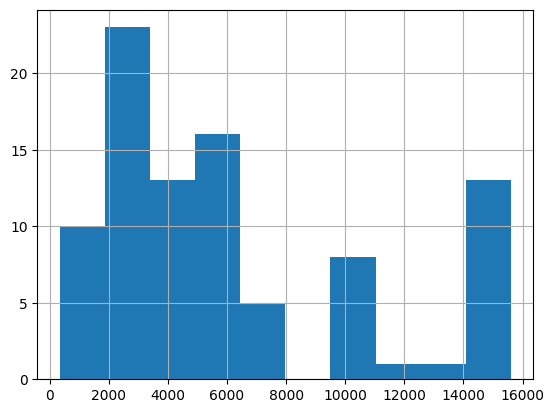

In [28]:

## EDA --> Histogran

df['PayloadMass'].hist()

array([[<Axes: title={'center': 'FlightNumber'}>,
        <Axes: title={'center': 'PayloadMass'}>,
        <Axes: title={'center': 'Flights'}>],
       [<Axes: title={'center': 'Block'}>,
        <Axes: title={'center': 'ReusedCount'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Class'}>, <Axes: >]], dtype=object)

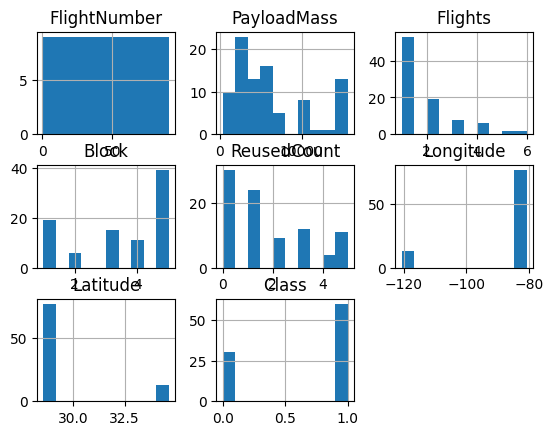

In [29]:

df.hist()


<Axes: >

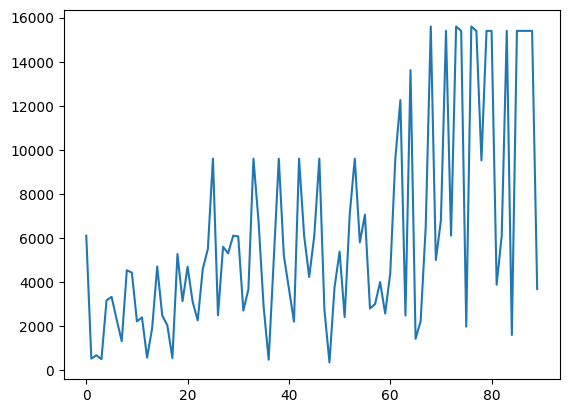

In [30]:

df['PayloadMass'].plot()


In [31]:

# Orbit : The type of orbit the payload was placed into (e.g., LEO, GTO).

df['Orbit']

0      LEO
1      LEO
2      ISS
3       PO
4      GTO
      ... 
85    VLEO
86    VLEO
87    VLEO
88    VLEO
89     MEO
Name: Orbit, Length: 90, dtype: object

In [32]:

## Different Categories of Orbit which payload was placed into (Unique)

set(df['Orbit'])

{'ES-L1', 'GEO', 'GTO', 'HEO', 'ISS', 'LEO', 'MEO', 'PO', 'SO', 'SSO', 'VLEO'}

In [33]:
len(set(df['Orbit']))

11

#### We have 11 kinds of Orbits for landing.

In [35]:

## How many of each Orbit ---> .value_counts()

df['Orbit'].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

<Axes: >

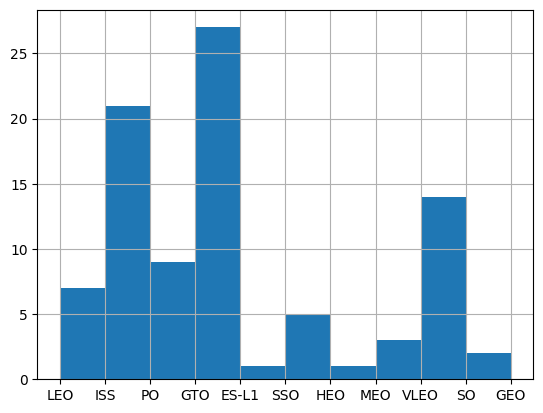

In [36]:

## Orbit is a Very Important Parameter for us.

df['Orbit'].hist()


#### Our Target is to know whether this delivery is successful, so 'Class' column is our Target.
#### successfully delivered --> Class ==1
#### We can divide our DF to two DFs, One Class == 1, and another Class == 0.


In [37]:

df_success = df[df['Class']== 1]


In [38]:
df_fail = df[df['Class']!= 1]

In [39]:
df_success.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 6 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    60 non-null     int64  
 1   Date            60 non-null     object 
 2   BoosterVersion  60 non-null     object 
 3   PayloadMass     60 non-null     float64
 4   Orbit           60 non-null     object 
 5   LaunchSite      60 non-null     object 
 6   Outcome         60 non-null     object 
 7   Flights         60 non-null     int64  
 8   GridFins        60 non-null     bool   
 9   Reused          60 non-null     bool   
 10  Legs            60 non-null     bool   
 11  LandingPad      55 non-null     object 
 12  Block           60 non-null     float64
 13  ReusedCount     60 non-null     int64  
 14  Serial          60 non-null     object 
 15  Longitude       60 non-null     float64
 16  Latitude        60 non-null     float64
 17  Class           60 non-null     int64  
dt

In [40]:

## Double check if Class == 1

set(df_success['Class'])

{1}

In [41]:

## Also for Class == 0

set(df_fail['Class'])

{0}

In [42]:

## Number of each Orbit in df_success

df_success['Orbit'].value_counts()

Orbit
GTO      14
ISS      13
VLEO     12
PO        6
LEO       5
SSO       5
MEO       2
ES-L1     1
HEO       1
GEO       1
Name: count, dtype: int64

In [43]:

## Number of each Orbit in df_success

df_fail['Orbit'].value_counts()

Orbit
GTO     13
ISS      8
PO       3
LEO      2
VLEO     2
MEO      1
SO       1
Name: count, dtype: int64

In [44]:

# LaunchSite : The physical location from which the rocket was launched.

# Categorical

df['LaunchSite'].value_counts()


LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

In [45]:

# Outcome : The result of the mission (e.g., success, failure).

df['Outcome'].value_counts()

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [46]:

## Double check it in Class == 1 

df_success['Outcome'].value_counts()

Outcome
True ASDS     41
True RTLS     14
True Ocean     5
Name: count, dtype: int64

In [47]:

## Also for Class == 0

df_fail['Outcome'].value_counts()

Outcome
None None      19
False ASDS      6
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [48]:

# Flights : The number of times the same booster has been used in previous launches.

df['Flights'].value_counts()


Flights
1    53
2    19
3     8
4     6
5     2
6     2
Name: count, dtype: int64

<Axes: >

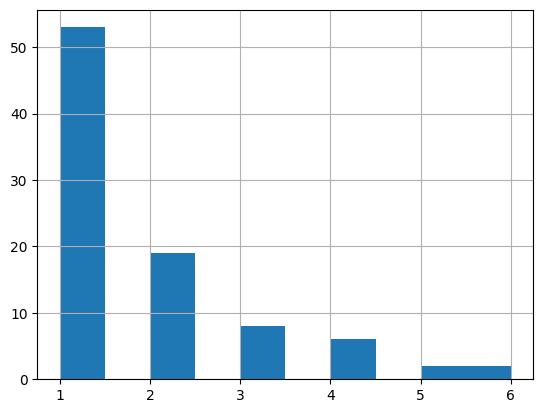

In [49]:

df['Flights'].hist()



#### GridFins, Reused and Legs type are boolean.


In [51]:

# GridFins : Indicates whether the rocket used grid fins for steering during landing (Yes/No or 1/0).

df['GridFins'].value_counts()


GridFins
True     70
False    20
Name: count, dtype: int64

In [52]:

# Reused : Shows if the booster was reused from a previous mission.

df['Reused'].value_counts()


Reused
False    53
True     37
Name: count, dtype: int64

In [53]:

# Legs : Whether the rocket had landing legs deployed.

df['Legs'].value_counts()


Legs
True     71
False    19
Name: count, dtype: int64

In [54]:

# LandingPad : The landing zone where the booster was intended to land.

df['LandingPad'].value_counts()


LandingPad
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: count, dtype: int64

In [55]:

# Block : The version block number of the Falcon booster (hardware upgrade level).

df['Block'].value_counts()


Block
5.0    39
1.0    19
3.0    15
4.0    11
2.0     6
Name: count, dtype: int64

In [56]:

# ReusedCount : How many times the booster has been reused.

df['ReusedCount'].value_counts()


ReusedCount
0    30
1    24
3    12
5    11
2     9
4     4
Name: count, dtype: int64

#### 30 of them never reused, 24 of them reused once, ...

In [58]:

# Serial : The unique serial number assigned to the booster.

df['Serial'].value_counts()


Serial
B1049    6
B1051    5
B1059    4
B1056    4
B1048    4
B1046    4
B1060    3
B1058    3
B1047    3
B1031    2
B1036    2
B1021    2
B1039    2
B1035    2
B1041    2
B1029    2
B1040    2
B1045    2
B1032    2
B1042    1
B1043    1
B1038    1
B1044    1
B1037    1
B1050    1
B1054    1
B1034    1
B0003    1
B1030    1
B1013    1
B0007    1
B1003    1
B1004    1
B1005    1
B1006    1
B1007    1
B1008    1
B1011    1
B1010    1
B1012    1
B1015    1
B0005    1
B1016    1
B1018    1
B1019    1
B1017    1
B1020    1
B1022    1
B1023    1
B1025    1
B1026    1
B1028    1
B1062    1
Name: count, dtype: int64


#### Longitude :  The longitude coordinate of the launch site.
#### Latitude :   The latitude coordinate of the launch site.
#### LaunchSite : The physical location from which the rocket was launched.


In [60]:
df['Longitude'].value_counts()


Longitude
-80.577366     55
-80.603956     22
-120.610829    13
Name: count, dtype: int64

In [61]:
df['Latitude'].value_counts()


Latitude
28.561857    55
28.608058    22
34.632093    13
Name: count, dtype: int64

In [62]:
df['LaunchSite'].value_counts()


LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


 The columns 'Longitude' and 'Latitude' have the same values as 'LaunchSite'
(e.g., 55, 22, 13), representing the same geographical location.
To avoid redundancy, we’ll remove 'Longitude' and 'Latitude' and keep only 'LaunchSite' in the dataset.

We also want to remove Serial which does not make any influence in Target and the BoosterVersion which all was Falcon 9.



In [64]:

df = df.drop(['BoosterVersion', 'Serial', 'Longitude', 'Latitude'], axis = 1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   Date          90 non-null     object 
 2   PayloadMass   90 non-null     float64
 3   Orbit         90 non-null     object 
 4   LaunchSite    90 non-null     object 
 5   Outcome       90 non-null     object 
 6   Flights       90 non-null     int64  
 7   GridFins      90 non-null     bool   
 8   Reused        90 non-null     bool   
 9   Legs          90 non-null     bool   
 10  LandingPad    64 non-null     object 
 11  Block         90 non-null     float64
 12  ReusedCount   90 non-null     int64  
 13  Class         90 non-null     int64  
dtypes: bool(3), float64(2), int64(4), object(5)
memory usage: 8.1+ KB



### We made a DF with 90 rows but 14 columns instead of 18.

####  In this way we can save the time, as using new DF to run the codes takes less time.




### Visualising the Data


!pip install matplotlib
!pip install seaborn


In [67]:

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline


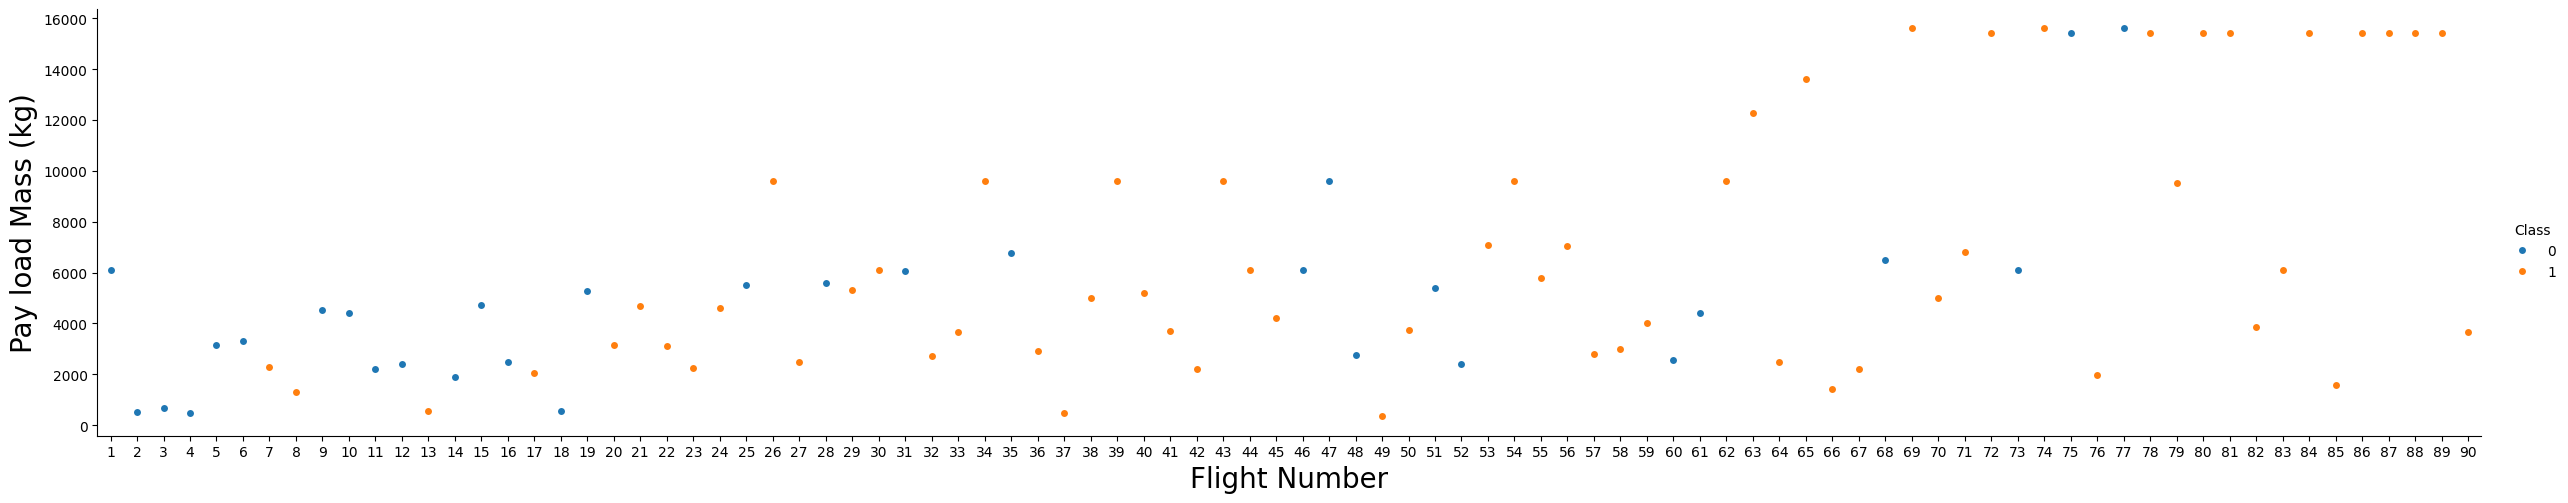

In [68]:

## Visualize the relationship between Flight Number and Payload Mass

sns.catplot(y = "PayloadMass", x = "FlightNumber", hue = "Class", data = df, aspect = 5)
plt.xlabel("Flight Number",fontsize = 20)
plt.ylabel("Pay load Mass (kg)",fontsize = 20)
plt.show()


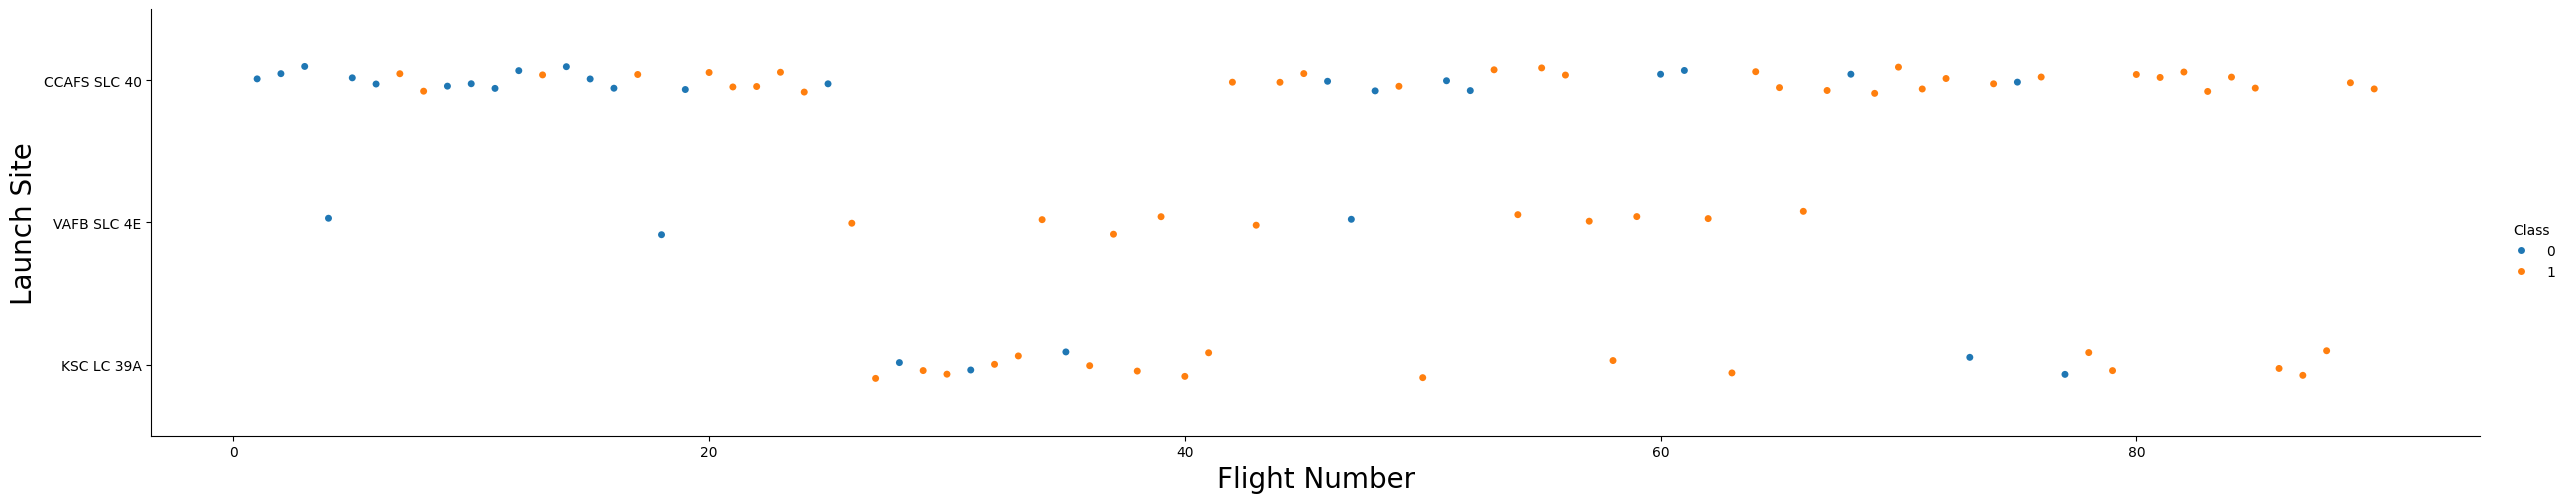

In [69]:

## Visualize the relationship between Flight Number and  Launch Site

sns.catplot(y = "LaunchSite", x = "FlightNumber", hue = "Class", data = df, aspect = 5)
plt.xlabel("Flight Number",fontsize = 20)
plt.ylabel("Launch Site",fontsize = 20)
plt.show()


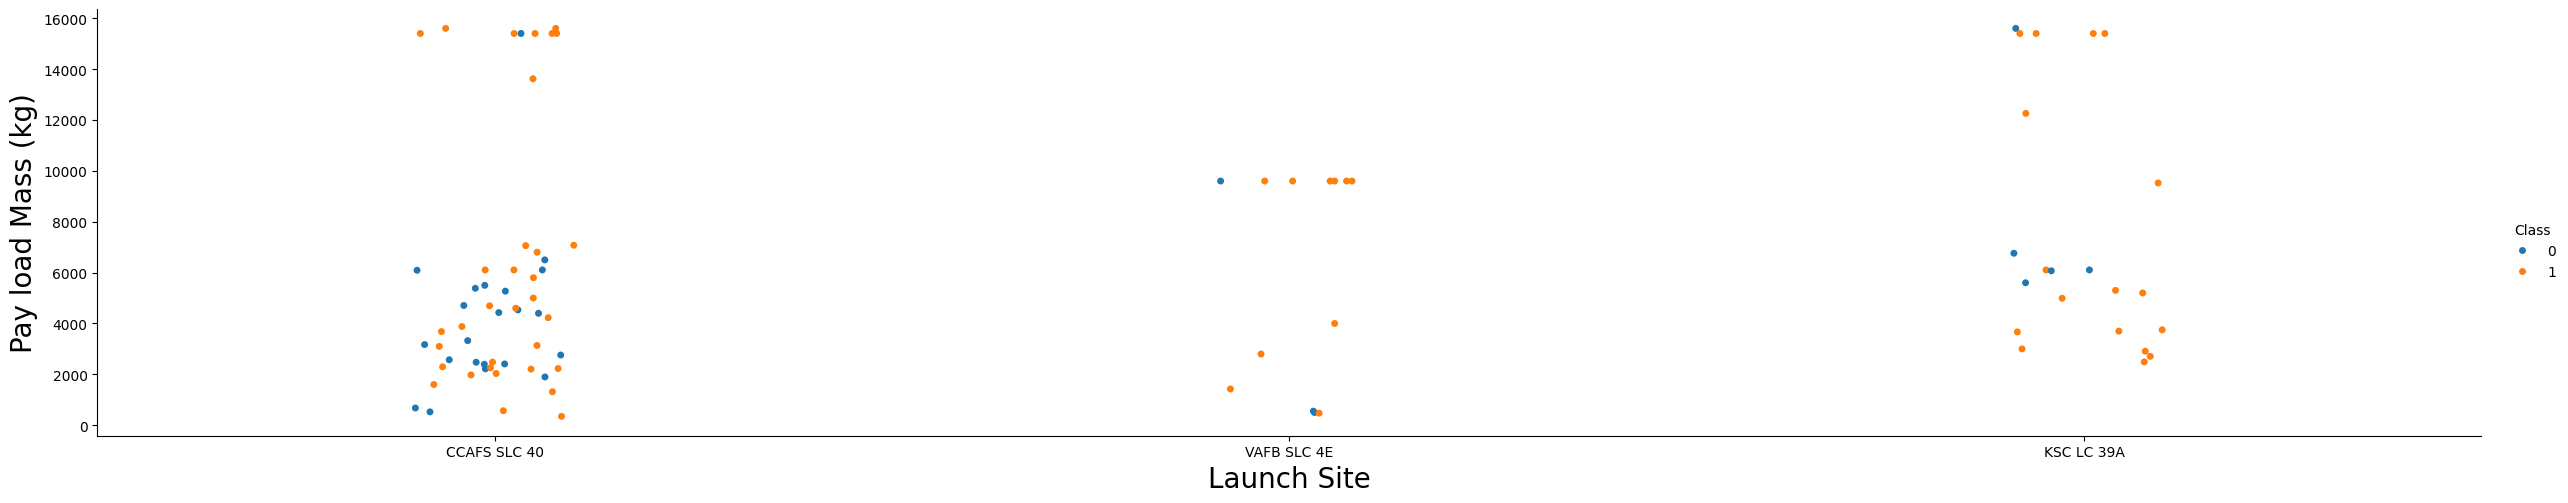

In [70]:

## Visualize the relationship between Payload and Launch Site
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

sns.catplot(y = "PayloadMass", x = "LaunchSite", hue = "Class" , data = df, aspect = 5)
plt.xlabel("Launch Site",fontsize = 20)
plt.ylabel("Pay load Mass (kg)",fontsize = 20)
plt.show()
       


### We had more payload in first launch site as we saw in previous plot that we had more flights in this launch site. 
#### First and third launch site had bigger payload, while second launch site had relatively less payload.


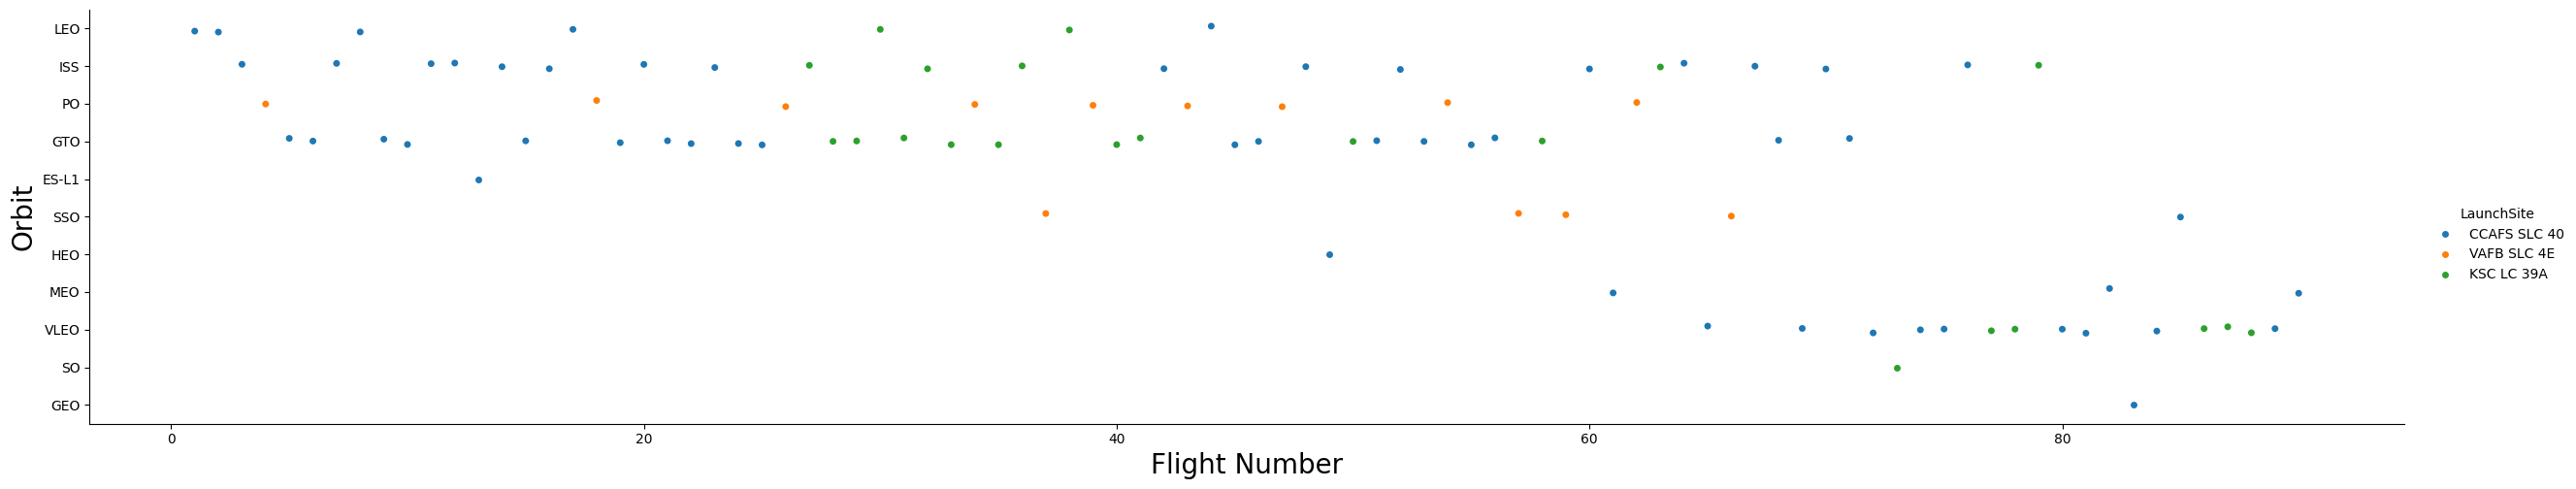

In [72]:

## Visualize the relationship between Flight Number and Orbit type
# Plot a scatter point chart with x axis to be Flight Number and y axis to be Orbit type, and hue to be the launch Site
sns.catplot(y = "Orbit", x = "FlightNumber", hue = "LaunchSite" , data = df, aspect = 5)
plt.xlabel("Flight Number",fontsize = 20)
plt.ylabel("Orbit",fontsize = 20)
plt.show()


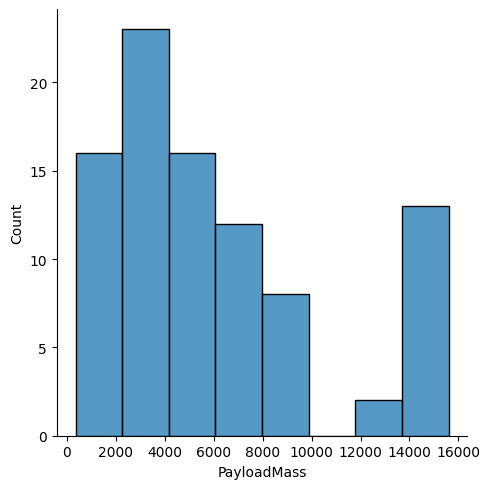

In [73]:

## Histogram

sns.displot(df['PayloadMass'])



#### The minimum payload mass was 350 kg. 
#### From 350 to around 2,200 kg, there were about 16 to 17 launches with payloads in this range. 
#### In addition, there were almost 25 launches with payload masses between 2,200 and 4,200 kg.
#### and so on. 


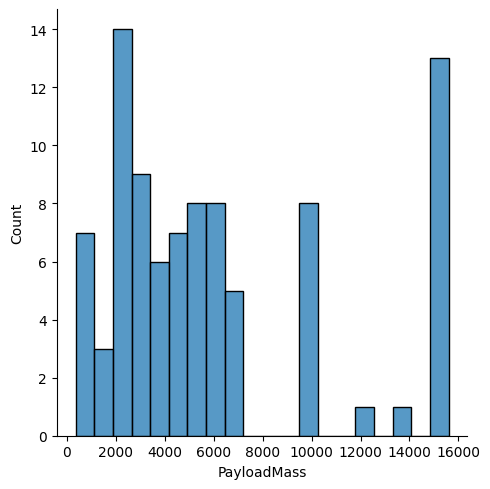

In [75]:
sns.displot(df['PayloadMass'], bins = 20)

<Axes: xlabel='LaunchSite', ylabel='count'>

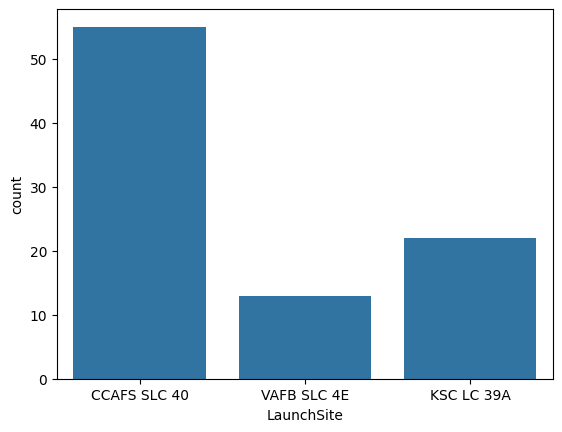

In [76]:

## Bar chart for Launch Site as a categorical data

sns.countplot(x = 'LaunchSite', data = df )





## 5) Data Preparation 

#### The data we receive is raw data. We need to transform it into usable data that can give us meaningful results or insights. 
#### This is where we use some of our Data Science skills to prepare the data for the outcomes we want to achieve.

#### Data Pre-processing
We aim to use this data to train and fit our ML models.
Since machine learning models rely on mathematical relationships and formulas, we need numerical data to process.
Therefore, categorical values must be converted into numerical ones.
Furthermore, there should be no missing values in the dataset.



In [78]:

## Here, we’ll practice how to manage a raw dataset:

!pip3 install openpyxl

import pandas as pd

df_missing = pd.read_excel('/Users/taherehehsan/missing_dataset_falcon9.xlsx')


In [79]:
df_missing

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,NaN,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,NaN,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5,2,B1060,-80.577366,28.561857,1


In [80]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     81 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      86 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud


##### PayloadMass has 81 non-null, means 9 missed value.
##### LaunchSite has 86 non-null, means 4 null value.
##### LandingPad has 64 non-null,  means 26 null value.     




### How to deal with missing data

### Droping Data


### a) Drop the whole row


In [82]:

df_row = df_missing.dropna(axis = 0)

df_row.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 13 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    58 non-null     int64         
 1   Date            58 non-null     datetime64[ns]
 2   BoosterVersion  58 non-null     object        
 3   PayloadMass     58 non-null     float64       
 4   Orbit           58 non-null     object        
 5   LaunchSite      58 non-null     object        
 6   Outcome         58 non-null     object        
 7   Flights         58 non-null     int64         
 8   GridFins        58 non-null     bool          
 9   Reused          58 non-null     bool          
 10  Legs            58 non-null     bool          
 11  LandingPad      58 non-null     object        
 12  Block           58 non-null     int64         
 13  ReusedCount     58 non-null     int64         
 14  Serial          58 non-null     object        
 15  Longitude   


#### It is not a good idea, becaused we missed almost 40% of our data.



### b) Drop the whole Column


In [84]:

df_col = df_missing.dropna(axis = 1)

df_col.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   Orbit           90 non-null     object        
 4   Outcome         90 non-null     object        
 5   Flights         90 non-null     int64         
 6   GridFins        90 non-null     bool          
 7   Reused          90 non-null     bool          
 8   Legs            90 non-null     bool          
 9   Block           90 non-null     int64         
 10  ReusedCount     90 non-null     int64         
 11  Serial          90 non-null     object        
 12  Longitude       90 non-null     float64       
 13  Latitude        90 non-null     float64       
 14  Class           90 non-null     int64         
dtypes: bool(


#### If the column was a irrelated one we can easily remove them but if it would be important 
#### we cannot drop them. It is not a good idea, becaused we miss important features.



### Replace Data

### a) Replace it by mean ( If it is Numerical)

In [86]:

payload_mean = df_missing['PayloadMass'].mean()

payload_mean

np.float64(6379.7368845315905)

In [87]:

df_missing['PayloadMass']


0      6104.959412
1       525.000000
2       677.000000
3              NaN
4      3170.000000
          ...     
85    15400.000000
86    15400.000000
87    15400.000000
88    15400.000000
89     3681.000000
Name: PayloadMass, Length: 90, dtype: float64


#### It is not high accurate way to replace it by mean, but for now it is applicable.

#### Replace "NaN" with the mean value 


In [89]:

!pip3 install numpy

import numpy as np

df_missing['PayloadMass']= df_missing['PayloadMass'].replace(np.nan, payload_mean)


In [90]:

df_missing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     90 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      86 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud


### b) Replace it by freaquency ( If it is categorical)


In [91]:

df_missing['LaunchSite'].value_counts()


LaunchSite
CCAFS SLC 40    53
KSC LC 39A      20
VAFB SLC 4E     13
Name: count, dtype: int64

In [92]:

# CCAFS SLC 40 is repeated 53 times, so it is more feaquent.

df_missing['LaunchSite'] = df_missing['LaunchSite'].replace(np.nan, 'CCAFS SLC 40')


In [93]:

df_missing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     90 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      90 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud




#### Filling missing values using the mean or frequency is often easy, 
#### but it isn’t always accurate, precise, or even correct. 
#### Therefore, we should also consider other relevant factors or conditions
#### before deciding how to handle missing data.

#### for example if we consider LandingPad as categorical value so:



In [94]:

df_missing['LandingPad'].value_counts()


LandingPad
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: count, dtype: int64

In [95]:

df_landingpad = df_missing[df_missing['LandingPad'] == '5e9e3032383ecb6bb234e7ca']


In [96]:

df_landingpad.info()


<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 15 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    35 non-null     int64         
 1   Date            35 non-null     datetime64[ns]
 2   BoosterVersion  35 non-null     object        
 3   PayloadMass     35 non-null     float64       
 4   Orbit           35 non-null     object        
 5   LaunchSite      35 non-null     object        
 6   Outcome         35 non-null     object        
 7   Flights         35 non-null     int64         
 8   GridFins        35 non-null     bool          
 9   Reused          35 non-null     bool          
 10  Legs            35 non-null     bool          
 11  LandingPad      35 non-null     object        
 12  Block           35 non-null     int64         
 13  ReusedCount     35 non-null     int64         
 14  Serial          35 non-null     object        
 15  Longitude   


#### we have 61 rows as we extract 61 landingpads which were equel to 5e9e3032383ecb6bb234e7ca.

#### How many unique orbits do they have? 


In [97]:

set(df_landingpad['Orbit'])


{'GTO', 'HEO', 'ISS', 'MEO', 'VLEO'}

In [98]:

## we Had more orbits than this and this is only orbits for that 61 landigpads.

df_missing[['LandingPad', 'Orbit']]


,LandingPad,Orbit
0,NaN,LEO
1,NaN,LEO
2,NaN,ISS
3,NaN,PO
4,NaN,GTO
...,...,...
85,5e9e3032383ecb6bb234e7ca,VLEO
86,5e9e3032383ecb6bb234e7ca,VLEO
87,5e9e3032383ecb6bb234e7ca,VLEO
88,5e9e3033383ecbb9e534e7cc,VLEO



 In the output we see that NaN values have different Orbits which is also different from 5e9e3032383ecb6bb234e7ca orbits.

If we fill the missing '5e9e3032383ecb6bb234e7ca' landing pad values based on orbit, it might be technically incorrect, since this orbit may not actually match that landing pad.

The company might not use this pad for such orbits, or other unknown factors may apply.
We can see that '5e9e3032383ecb6bb234e7ca' landing pads are linked to specific orbits, while the rows with missing pads have different orbits. 

So, using '5e9e3032383ecb6bb234e7ca' as a replacement would be misleading.

In short, the most frequent value isn’t always the right choice for missing data.


 How to know which feature's relation is more decisive for filling missing values? 

 We should consider other columns and features, and more importantly, we should have a domin knowledge about the dataset, to understand which one is more decisive for filling missing values out.


5e9e3032383ecb6bb234e7ca is more frequent so: 

In [100]:

## Let's back to our dataframe

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   Date          90 non-null     object 
 2   PayloadMass   90 non-null     float64
 3   Orbit         90 non-null     object 
 4   LaunchSite    90 non-null     object 
 5   Outcome       90 non-null     object 
 6   Flights       90 non-null     int64  
 7   GridFins      90 non-null     bool   
 8   Reused        90 non-null     bool   
 9   Legs          90 non-null     bool   
 10  LandingPad    64 non-null     object 
 11  Block         90 non-null     float64
 12  ReusedCount   90 non-null     int64  
 13  Class         90 non-null     int64  
dtypes: bool(3), float64(2), int64(4), object(5)
memory usage: 8.1+ KB


In [101]:

df = df.drop(['FlightNumber', 'Date'], axis = 1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PayloadMass  90 non-null     float64
 1   Orbit        90 non-null     object 
 2   LaunchSite   90 non-null     object 
 3   Outcome      90 non-null     object 
 4   Flights      90 non-null     int64  
 5   GridFins     90 non-null     bool   
 6   Reused       90 non-null     bool   
 7   Legs         90 non-null     bool   
 8   LandingPad   64 non-null     object 
 9   Block        90 non-null     float64
 10  ReusedCount  90 non-null     int64  
 11  Class        90 non-null     int64  
dtypes: bool(3), float64(2), int64(3), object(4)
memory usage: 6.7+ KB


In [102]:

df.head()


,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Class
0,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,0
1,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,0
2,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,0
3,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,0
4,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,0


In [103]:

## We convey categorical data to numerical.

df['LaunchSite']


0     CCAFS SLC 40
1     CCAFS SLC 40
2     CCAFS SLC 40
3      VAFB SLC 4E
4     CCAFS SLC 40
          ...     
85      KSC LC 39A
86      KSC LC 39A
87      KSC LC 39A
88    CCAFS SLC 40
89    CCAFS SLC 40
Name: LaunchSite, Length: 90, dtype: object

In [104]:
set(df['LaunchSite'])

{'CCAFS SLC 40', 'KSC LC 39A', 'VAFB SLC 4E'}


### Dummy Variable:

#### We use dummy variable to label categories numerically.
#### this numbers do not have meaning inherently.


In [105]:

dummy_1 = pd.get_dummies(df['LaunchSite'], dtype=int )

dummy_1


,CCAFS SLC 40,KSC LC 39A,VAFB SLC 4E
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
85,0,1,0
86,0,1,0
87,0,1,0
88,1,0,0


In [106]:

dummy_2 = pd.get_dummies(df['LandingPad'], dtype=int )

dummy_2[10 : 20]


,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecbb9e534e7cc
10,0,0,0,0,0
11,0,0,0,1,0
12,0,0,0,0,0
13,0,0,0,1,0
14,0,0,0,0,0
15,0,0,1,0,0
16,1,0,0,0,0
17,0,0,0,0,1
18,0,0,1,0,0
19,0,0,1,0,0



#### We have some rows which all values are 0, means NaN values which are non of this landing pads. Like index 10


In [108]:

# Convey all categorical to dummy

df_dummy = pd.get_dummies(df[['Orbit', 'LaunchSite', 'Outcome', 'LandingPad']], dtype = int)


In [109]:

df_dummy


,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1



### BOOLEAN Variable: 

#### TURN BOOLEAN from True/False to 1/0


In [110]:

df['GridFins'] = df['GridFins'].astype(int)

df['Reused'] = df['Reused'].astype(int)

df['Legs'] = df['Legs'].astype(int)


In [111]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PayloadMass  90 non-null     float64
 1   Orbit        90 non-null     object 
 2   LaunchSite   90 non-null     object 
 3   Outcome      90 non-null     object 
 4   Flights      90 non-null     int64  
 5   GridFins     90 non-null     int64  
 6   Reused       90 non-null     int64  
 7   Legs         90 non-null     int64  
 8   LandingPad   64 non-null     object 
 9   Block        90 non-null     float64
 10  ReusedCount  90 non-null     int64  
 11  Class        90 non-null     int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 8.6+ KB


In [112]:

## drop objects from DF

df = df.drop(['Orbit', 'LaunchSite', 'Outcome', 'LandingPad'], axis = 1)


In [113]:

# Concat()

df = pd.concat([df, df_dummy], axis = 1)


In [114]:
df

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,6104.959412,1,0,0,0,1.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,525.000000,1,0,0,0,1.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,677.000000,1,0,0,0,1.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,500.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400.000000,2,1,1,1,5.0,2,1,0,0,...,0,0,1,0,0,0,0,1,0,0
86,15400.000000,3,1,1,1,5.0,2,1,0,0,...,0,0,1,0,0,0,0,1,0,0
87,15400.000000,6,1,1,1,5.0,5,1,0,0,...,0,0,1,0,0,0,0,1,0,0
88,15400.000000,3,1,1,1,5.0,2,1,0,0,...,0,0,1,0,0,0,0,0,0,1




#### Now we have a pre-processed data frame that we can use for modeling in machine learning.


#### All values are numerical. there is no missing value, and the columns are more than raw data.



In [116]:

# Now it is time to save that:

df.to_csv('preprocessed_dataset.csv')


In [117]:
# Save the DataFrame to your desired location

df.to_csv('/Users/taherehehsan/out.csv')
